In [3]:
from file import load
from datetime import date
from collections import Counter
import matplotlib.pyplot as plt


In [4]:
symbol = 'MAGS'
data = load(symbol)
details = data['ticker_details']
print(details.ticker_root, details.name)
xweeks = []
prev_week = []
for w in data['options_weekly']:
  day = w['day']
  exp_weeks = [round((date.fromisoformat(p['contract'].expiration_date) - day.date).days / 7) for p in w['options']]
  new_weeks = sorted(list(set(exp_weeks) - set(w-1 for w in prev_week)))
  print(day.date, *[f'{x:3d}' for x in exp_weeks])
  if new_weeks:
    print('       new', *[f'{x:3d}' for x in new_weeks])
  xweeks += exp_weeks
  prev_week = exp_weeks

MAGS Listed Funds Trust Roundhill Magnificent Seven ETF
2023-11-10   1   5  18  32
       new   1   5  18  32
2023-11-17   0   4   9  17  31
       new   9
2023-11-24   3   8  16  30
2023-12-01   2   7  15  29
2023-12-08   1   6  14  28
2023-12-15   0   5   9  13  27
       new   9
2023-12-22   4   8  12  26
2023-12-29   3   7  11  25
2024-01-05   2   6  10  24
2024-01-12   1   5   9  23
2024-01-19   0   4   8  22  35
       new  35
2024-01-26   3   7  21  34
2024-02-02   2   6  20  33
2024-02-09   1   5  19  32
2024-02-16   0   4   9  18  31
       new   9
2024-02-23   3   8  17  30
2024-03-01   2   7  16  29
2024-03-08   1   6  15  28
2024-03-15   0   5   9  14  27
       new   9
2024-03-22   4   8  13  26
2024-03-28   3   7  12  25
2024-04-05   2   6  11  24
2024-04-12   1   5  10  23
2024-04-19   0   4   9  22  35
       new  35
2024-04-26   3   8  21  34
2024-05-03   2   7  20  33
2024-05-10   1   6  19  32
2024-05-17   0   5   9  18  31
       new   9
2024-05-24   4   8  17  30
2

In [5]:
total_weeks = len(data['options_weekly'])
print('total weeks:', total_weeks)
counter = Counter(xweeks)
print('weeks count frequency')
for w, c in sorted(counter.items()):
    print(f'{w:5d} {c:5d} {total_weeks/c:9.1f}')

total weeks: 31
weeks count frequency
    0     7       4.4
    1     7       4.4
    2     7       4.4
    3     7       4.4
    4     7       4.4
    5     7       4.4
    6     7       4.4
    7     7       4.4
    8     7       4.4
    9     7       4.4
   10     2      15.5
   11     2      15.5
   12     2      15.5
   13     2      15.5
   14     2      15.5
   15     3      10.3
   16     3      10.3
   17     3      10.3
   18     3      10.3
   19     2      15.5
   20     2      15.5
   21     2      15.5
   22     2      15.5
   23     2      15.5
   24     2      15.5
   25     2      15.5
   26     2      15.5
   27     2      15.5
   28     3      10.3
   29     3      10.3
   30     3      10.3
   31     3      10.3
   32     3      10.3
   33     2      15.5
   34     2      15.5
   35     2      15.5


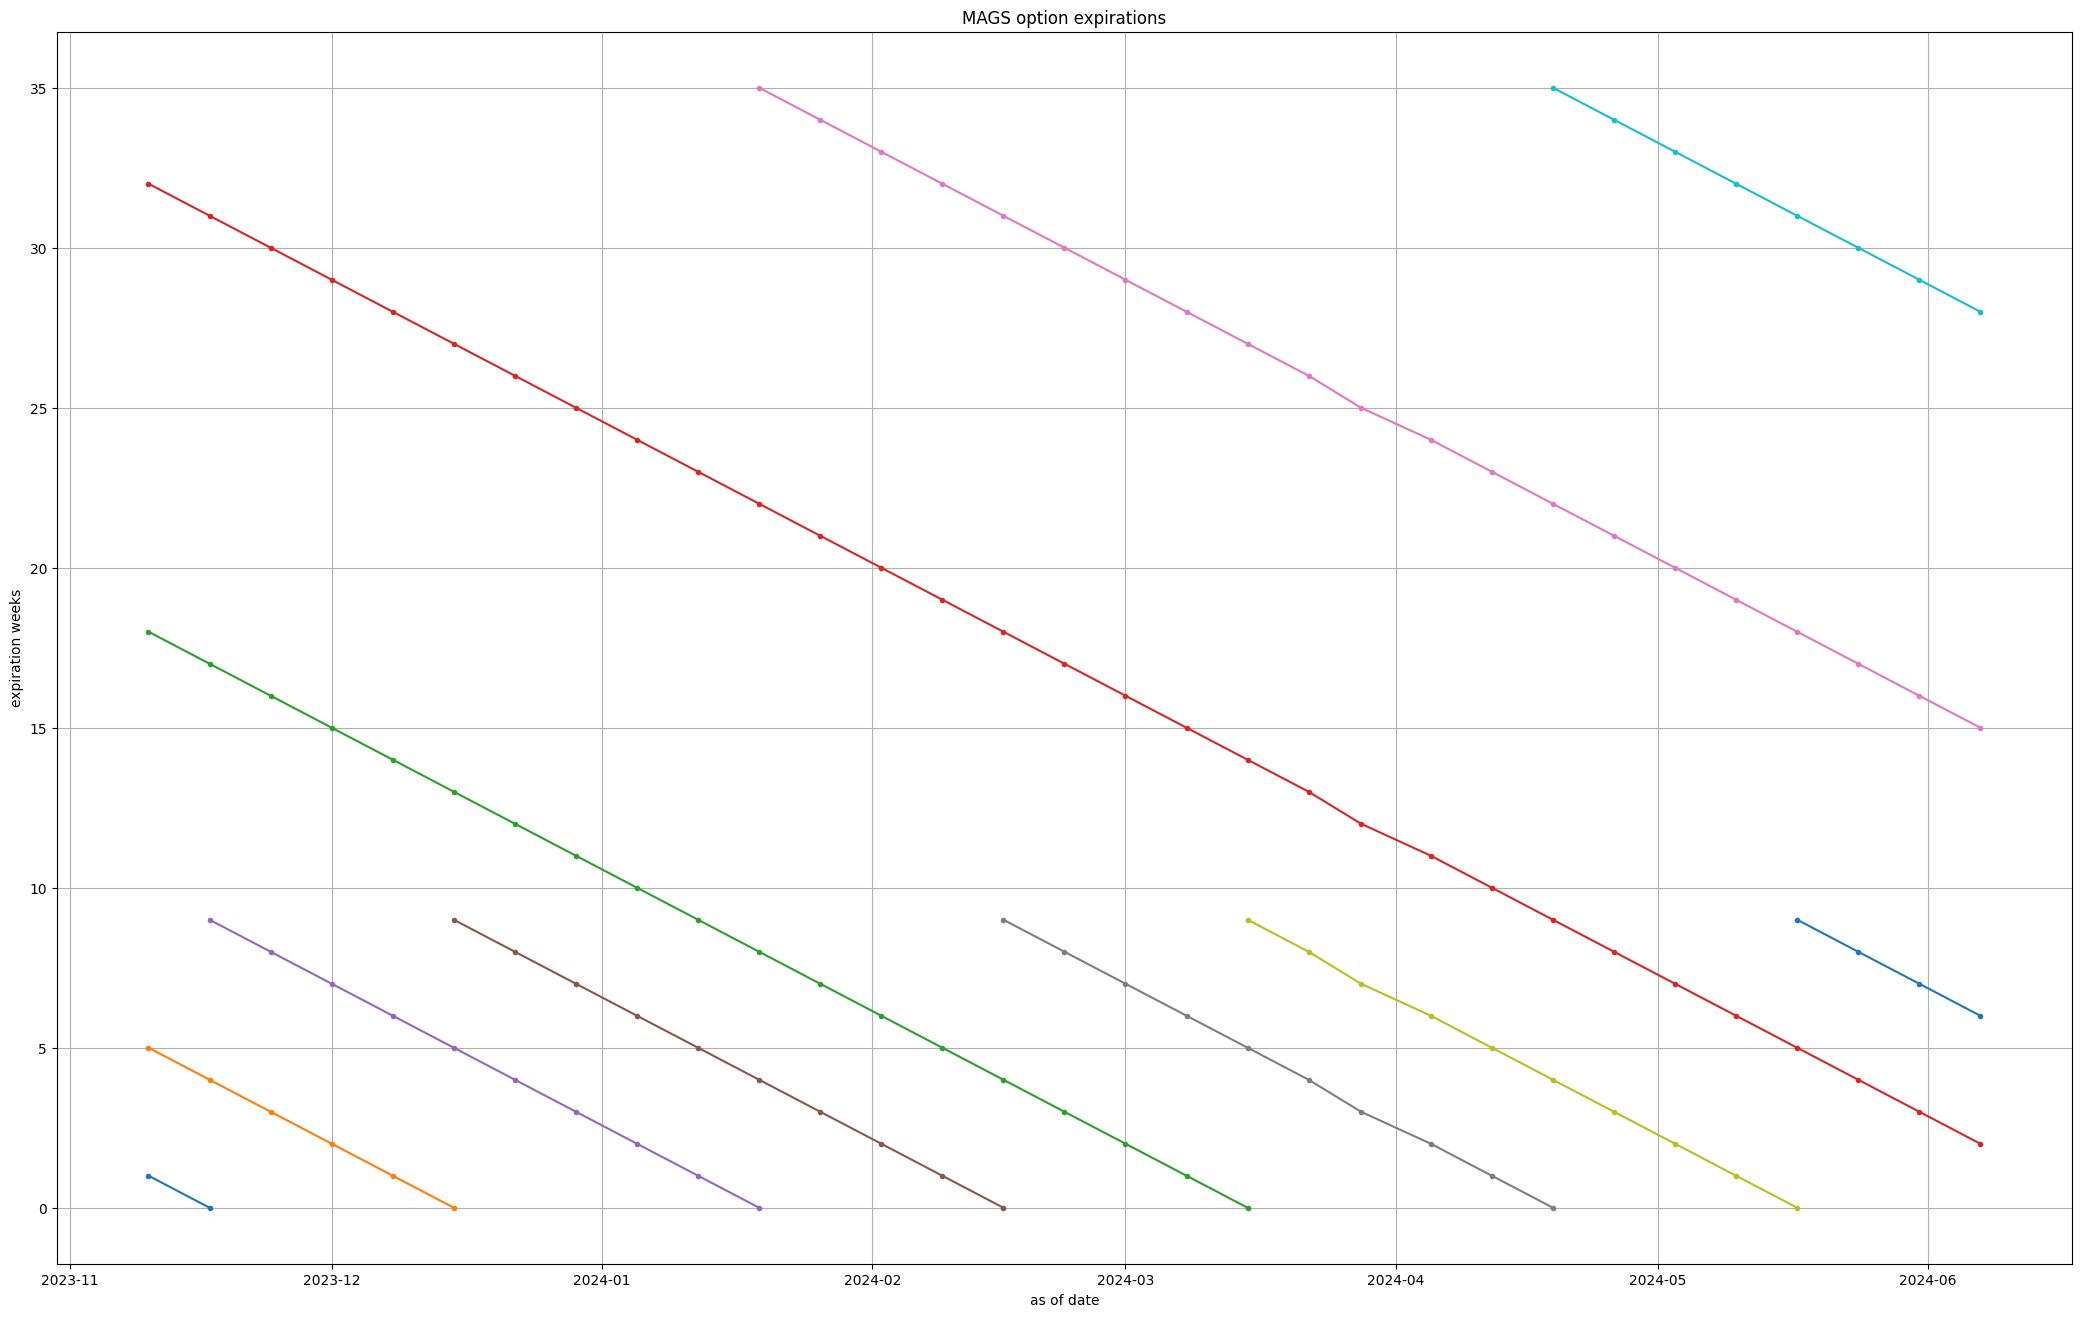

In [6]:
result = {}
for w in data['options_weekly']:
  day = w['day']
  for p in w['options']:
    exp_date = date.fromisoformat(p['contract'].expiration_date)
    # exp_weeks = round((exp_date - day.date).days / 7)
    if not exp_date in result:
      result[exp_date] = []
    result[exp_date].append(day.date)

plt.figure(figsize=(26,16))
for exp_date, dates in result.items():
  x = dates
  y = [round((exp_date - d).days / 7) for d in dates]
  plt.plot(x, y, label=exp_date, marker='.')
# plt.legend()
plt.title(symbol + ' option expirations')
plt.xlabel('as of date')
plt.ylabel('expiration weeks')
plt.grid()
plt.show()